In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import re
from scipy.stats import pearsonr
from scipy.stats import linregress

%matplotlib inline

In [2]:
df = pd.read_csv('../data/fandango/fandango_score_comparison.csv')

In [21]:
df.sample(3)
#df.columns.tolist()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
20,"McFarland, USA (2015)",79,89,60,7.2,7.5,5.0,4.6,3.95,4.45,...,4.0,4.5,3.0,3.5,4.0,59,13769,3364,0.4,2.0
86,Me and Earl and The Dying Girl (2015),81,89,74,8.4,8.2,4.5,4.3,4.05,4.45,...,4.0,4.5,3.5,4.0,4.0,41,5269,624,0.2,1.0
77,Vacation (2015),27,55,34,6.2,6.3,4.0,3.8,1.35,2.75,...,1.5,3.0,1.5,3.0,3.0,72,8179,3815,0.2,2.5


In [4]:
RT_user_norm = (df['RottenTomatoes_User']/100)*5
RT_user_norm_round = RT_user_norm.round()
RT_user_norm_round.sample(3)

36    2.0
57    3.0
54    3.0
Name: RottenTomatoes_User, dtype: float64

In [22]:
#Filtering out column names with 'norm' in name and 'round' NOT in name.

norms = [i for i in df.columns.tolist() if (re.search('[no]r[m]',i) and not (re.search('[ro]un[d]',i)))]
print(norms)

#Creating a new dataframe with norms

df_norm = df[norms]
df_norm.sample(2)

['RT_norm', 'RT_user_norm', 'Metacritic_norm', 'IMDB_norm']


,RT_norm,RT_user_norm,Metacritic_norm,IMDB_norm
47,1.35,3.05,1.65,2.60
49,1.30,3.00,1.90,3.45


In [53]:
df_norm.RT_norm.values.sum() / df_norm.RT_norm.value_counts().sum()

3.0424657534246577

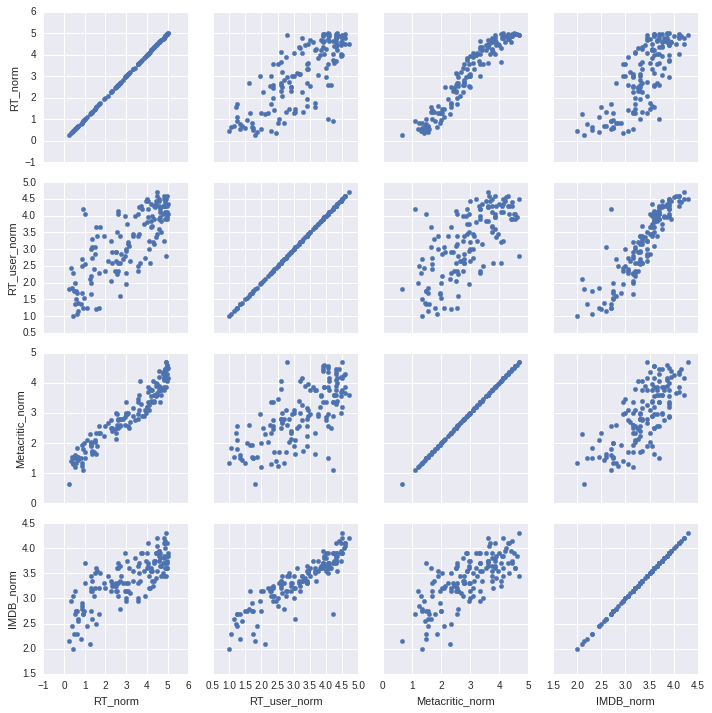

In [6]:
g = sns.PairGrid(df_norm);
g.map(plt.scatter);

In [7]:
rounds = [i for i in df.columns.tolist() if (re.search('[ro]un[d]',i))]


#Appending Fandango comparisons
rounds.append('Fandango_Stars')
print(rounds)

['RT_norm_round', 'RT_user_norm_round', 'Metacritic_norm_round', 'Metacritic_user_norm_round', 'IMDB_norm_round', 'Fandango_Stars']


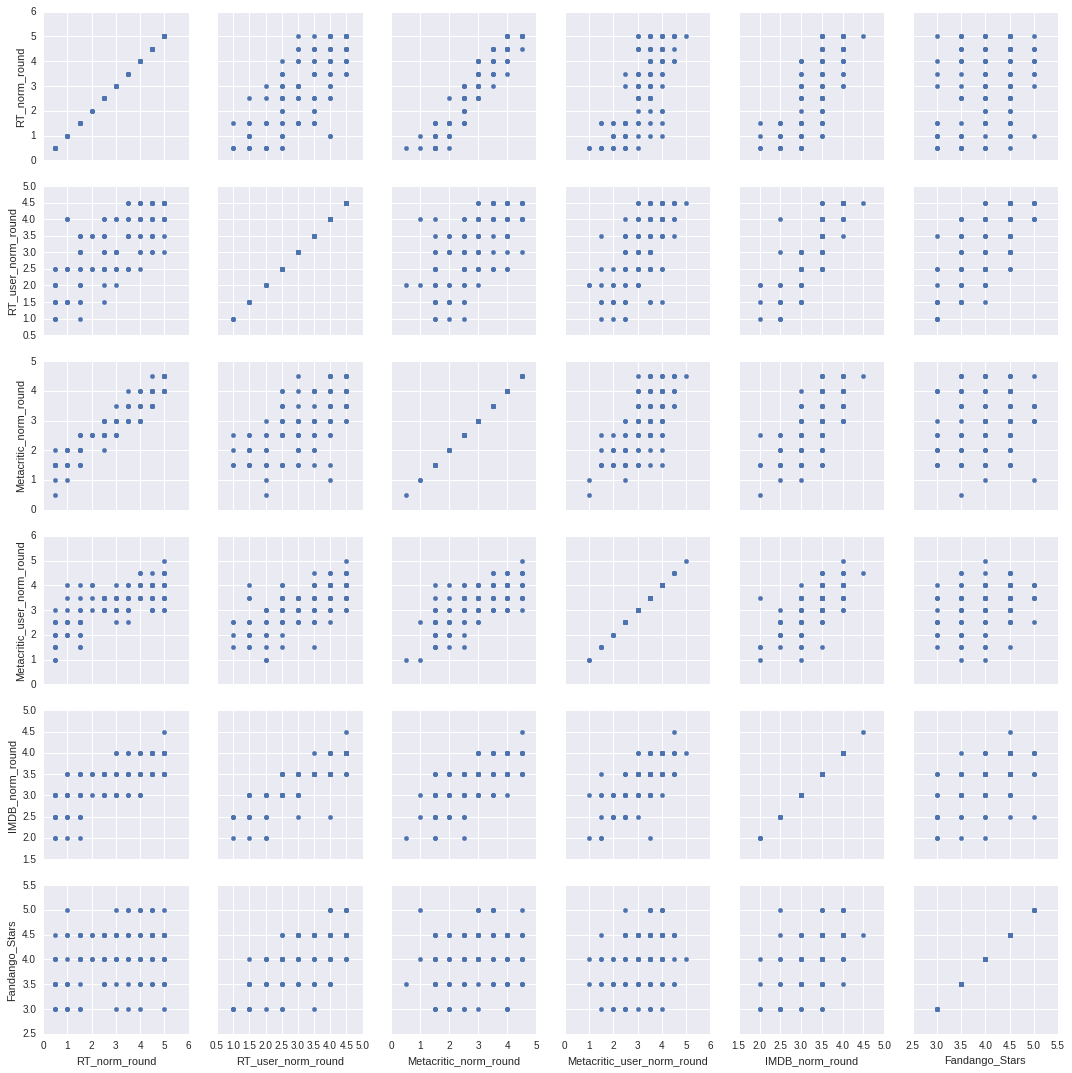

In [8]:
g = sns.PairGrid(df[rounds]);
g.map(plt.scatter);

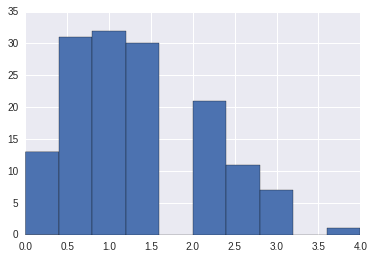

In [9]:
#Subtracting the rounded Metacritic norms column  from Fandango_Stars column
#Then the absolute values of the resulting column

df['fm_diff'] = df['Fandango_Stars'] - df['Metacritic_norm_round']
df['fm_diff'] = df['fm_diff'].abs()
df['fm_diff'].hist(bins=10)
plt.show()

In [10]:
#Sorting values by fm_diff column and printing out to top 5 movies with greatest fm_diff values

df.sort_values(by='fm_diff',ascending=False)[:5]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [11]:
np.correlate(df.Fandango_Stars,df.Metacritic_norm_round)

array([ 1788.5])

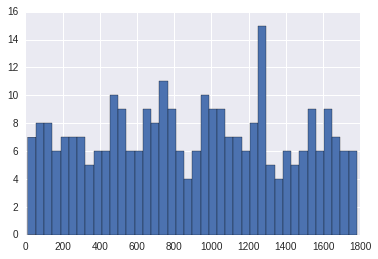

In [12]:
plt.hist(np.convolve(df.Fandango_Stars,df.Metacritic_norm_round),bins=40);

In [13]:
df.Fandango_Stars.size, df.Metacritic_norm_round.size

(146, 146)

In [14]:
#Computing pearsonr

pearsonr(df.Fandango_Stars,df.Metacritic_norm_round)

(0.17844919073895918, 0.031161516228523815)

# Notes:

        - There is poor r-correlation between Fandango stars and normalized and rounded Metacritic values.
        - This shows that movies that may have high Fandango Star ratings may have low or high Metacritic ratings.
        - r-values indicate a low linear predicability between these data points.


In [15]:
np.cov(df.Fandango_Stars,df.Metacritic_norm_round)

array([[ 0.29201701,  0.09555975],
       [ 0.09555975,  0.98200283]])

In [16]:
np.var(df.Fandango_Stars)*np.var(df.Metacritic_norm_round)

0.28284673952164885

In [17]:
np.cov(df.Fandango_Stars,df.Metacritic_norm_round)*(_)

array([[ 0.08259606,  0.02702876],
       [ 0.02702876,  0.2777563 ]])

In [18]:
#Performing regression 

reg = linregress(df.Metacritic_norm_round,df.Fandango_Stars)

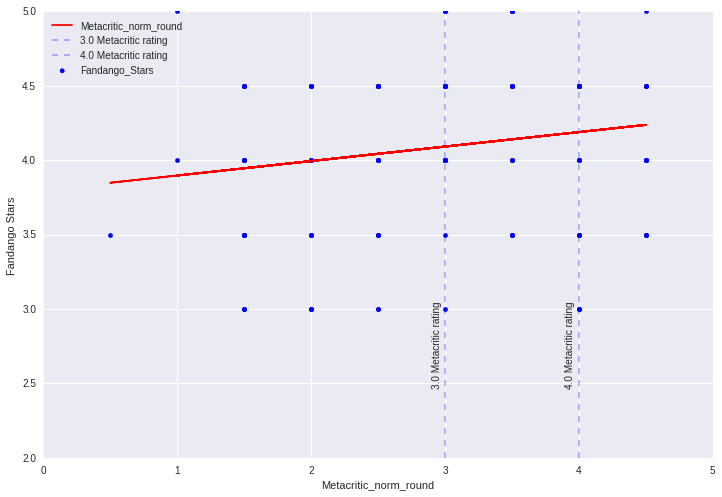

In [19]:
ypred = reg.slope*(df.Metacritic_norm_round) + reg.intercept
plt.figure(figsize=(12,8))
plt.xlim((0,5))
plt.ylim((2,5))
plt.xlabel('Metacritic_norm_round')
plt.ylabel('Fandango Stars')
plt.plot(df.Metacritic_norm_round,ypred,color='r')
plt.legend()
plt.scatter(df.Metacritic_norm_round,df.Fandango_Stars,color='b')
plt.legend()
plt.axvline(3.0,alpha=0.3,dash_joinstyle='miter',linestyle='dashed',label='3.0 Metacritic rating')
plt.text(2.9,3.0,'3.0 Metacritic rating',rotation=90)
plt.axvline(4.0,alpha=0.3,dash_joinstyle='miter',linestyle='dashed', label = '4.0 Metacritic rating')
plt.text(3.9,3.0,'4.0 Metacritic rating',rotation=90)
plt.legend(loc='upper left')
plt.show()

In [20]:
rating = 3.0

Fandango_3pred = reg.slope*3.0 + reg.intercept 
print(Fandango_3pred)

4.09170715282
